# Project2_Taewoo Kim_20233219

## 2. Text Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns
import os
import pandas as pd
import string
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('pjt2_data/NLP_finn.csv')
df.head()

,Title,Akwds,Kwds,Abst,Affil,Year,Jabb
0,PACING STRATEGIC CHANGE - THE CASE OF A NEW VE...,NaN,PERFORMANCE; TIME; MANAGEMENT; DECISIONS; FIRM,Theorists debate whether organizations are ine...,NaN,1994,Acad. Manage. J.
1,GENDER DIFFERENCES IN MANAGERS DEVELOPMENTAL J...,NaN,RATIONAL BIAS; DISCRIMINATION; EMPLOYMENT; IMP...,It has been suggested that one reason so few w...,NaN,1994,Acad. Manage. J.
2,INVESTIGATING THE GLASS CEILING PHENOMENON - A...,NaN,SELECTION DECISION-MODELS; MANAGERIAL POSITION...,Although a ''glass ceiling'' is said to keep w...,University of Massachusetts System; University...,1994,Acad. Manage. J.
3,BRINGING THE INDIVIDUAL BACK IN - A STRUCTURAL...,NaN,PERFORMANCE-APPRAISAL RESEARCH; INFORMANT ACCU...,We challenge the claimed incommensurability of...,Carnegie Mellon University,1994,Acad. Manage. J.
4,EXTENDING MODERN PORTFOLIO THEORY INTO THE DOM...,NaN,MODERN FINANCIAL THEORY; SYSTEMATIC-RISK; CAPI...,It is widely held that diversification lowers ...,Case Western Reserve University,1994,Acad. Manage. J.


In [3]:
df.groupby('Jabb')['Title'].count()

Jabb
Acad. Manage. J.       1774
Manage. Sci.           5394
Organ Sci.             1781
Strateg. Manage. J.    2282
Name: Title, dtype: int64

In [4]:
df['Jabb'].describe()

count            11231
unique               4
top       Manage. Sci.
freq              5394
Name: Jabb, dtype: object

In [5]:
abst = df['Abst']

### (1) P: Punctuation

In [6]:
punctuation = string.punctuation # !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

abst = abst.str.translate(str.maketrans('', '', punctuation))

if any(abst.apply(lambda x: any(c in punctuation for c in x))):
    print('Yes Puctuation')
else:
    print('No Punctuation')

No Punctuation


### (2) N: Numbers

In [7]:
import re
abst = abst.apply(lambda x: re.sub(r'\d+', '', x))

if abst.str.contains('\d+').any():
    print('Yes Number') 
else:
    print('No Number')

No Number


### (3) L: Lowercasing

In [8]:
abst = abst.str.lower()

has_uppercase = abst.str.contains('[A-Z]').any()
if has_uppercase == True:
    print("Yes Uppercase")
else:
    print("No Uppercase")

No Uppercase


### (4) S: Stemming

In [9]:
stemmer = PorterStemmer()
abst_stem = abst.apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)])) #abst는 stem 안한 상태, abst_stem은 stem 한 상태

### (5) W: Stopword Removal

In [10]:
# stopwords 로드
stop_words = set(stopwords.words('english'))

# 'text' 열에서 stopwords 제거
abst = abst.apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
abst_stem = abst_stem.apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

### (6) 3 n-grams & Infrequently used terms

In [11]:
vectorizer1 = CountVectorizer(ngram_range=(1,3), min_df=0.01)
X = vectorizer1.fit_transform(abst).toarray() # without stemming

vectorizer2 = CountVectorizer(ngram_range=(1,3), min_df=0.01)
X_stem = vectorizer2.fit_transform(abst_stem).toarray() # with stemming

In [12]:
wo_stem = list(vectorizer1.vocabulary_.keys())
#print(wo_stem)

In [13]:
w_stem = list(vectorizer2.vocabulary_.keys())
#print(w_stem)

### Visualize Word Counts

In [14]:
# before preprocessing
wc_before = df['Abst'].apply(lambda x: len(x.split()))
# after preprocessing without stemming
wc_after = pd.Series(np.sum(X, axis=1))

In [15]:
print(df.shape)

(11231, 7)


In [16]:
print(wc_before.shape)

(11231,)


In [17]:
print(wc_after.shape)

(11231,)


In [18]:
df['wc_before'] = wc_before
df['wc_after'] = wc_after

In [19]:
df.head()

,Title,Akwds,Kwds,Abst,Affil,Year,Jabb,wc_before,wc_after
0,PACING STRATEGIC CHANGE - THE CASE OF A NEW VE...,NaN,PERFORMANCE; TIME; MANAGEMENT; DECISIONS; FIRM,Theorists debate whether organizations are ine...,NaN,1994,Acad. Manage. J.,113,43
1,GENDER DIFFERENCES IN MANAGERS DEVELOPMENTAL J...,NaN,RATIONAL BIAS; DISCRIMINATION; EMPLOYMENT; IMP...,It has been suggested that one reason so few w...,NaN,1994,Acad. Manage. J.,71,29
2,INVESTIGATING THE GLASS CEILING PHENOMENON - A...,NaN,SELECTION DECISION-MODELS; MANAGERIAL POSITION...,Although a ''glass ceiling'' is said to keep w...,University of Massachusetts System; University...,1994,Acad. Manage. J.,79,34
3,BRINGING THE INDIVIDUAL BACK IN - A STRUCTURAL...,NaN,PERFORMANCE-APPRAISAL RESEARCH; INFORMANT ACCU...,We challenge the claimed incommensurability of...,Carnegie Mellon University,1994,Acad. Manage. J.,97,38
4,EXTENDING MODERN PORTFOLIO THEORY INTO THE DOM...,NaN,MODERN FINANCIAL THEORY; SYSTEMATIC-RISK; CAPI...,It is widely held that diversification lowers ...,Case Western Reserve University,1994,Acad. Manage. J.,75,36


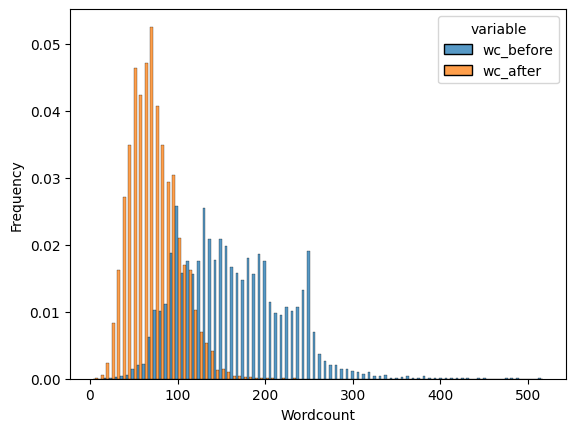

In [20]:
df_melt = pd.melt(df, id_vars=['Jabb'], value_vars=['wc_before', 'wc_after'])
sns.histplot(df_melt, x='value', hue='variable', stat='probability', multiple='dodge')
plt.xlabel('Wordcount')
plt.ylabel('Frequency')
plt.show()